# EBAC - Regressão II - regressão múltipla

## Tarefa I

#### Previsão de renda II

Vamos continuar trabalhando com a base 'previsao_de_renda.csv', que é a base do seu próximo projeto. Vamos usar os recursos que vimos até aqui nesta base.

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('previsao_de_renda.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             15000 non-null  int64  
 1   data_ref               15000 non-null  object 
 2   id_cliente             15000 non-null  int64  
 3   sexo                   15000 non-null  object 
 4   posse_de_veiculo       15000 non-null  bool   
 5   posse_de_imovel        15000 non-null  bool   
 6   qtd_filhos             15000 non-null  int64  
 7   tipo_renda             15000 non-null  object 
 8   educacao               15000 non-null  object 
 9   estado_civil           15000 non-null  object 
 10  tipo_residencia        15000 non-null  object 
 11  idade                  15000 non-null  int64  
 12  tempo_emprego          12427 non-null  float64
 13  qt_pessoas_residencia  15000 non-null  float64
 14  renda                  15000 non-null  float64
dtypes:

In [5]:
X = df.drop(['Unnamed: 0' , 'data_ref' ], axis = 1)

X.dropna(inplace = True)

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12427 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_cliente             12427 non-null  int64  
 1   sexo                   12427 non-null  object 
 2   posse_de_veiculo       12427 non-null  bool   
 3   posse_de_imovel        12427 non-null  bool   
 4   qtd_filhos             12427 non-null  int64  
 5   tipo_renda             12427 non-null  object 
 6   educacao               12427 non-null  object 
 7   estado_civil           12427 non-null  object 
 8   tipo_residencia        12427 non-null  object 
 9   idade                  12427 non-null  int64  
 10  tempo_emprego          12427 non-null  float64
 11  qt_pessoas_residencia  12427 non-null  float64
 12  renda                  12427 non-null  float64
dtypes: bool(2), float64(3), int64(3), object(5)
memory usage: 1.2+ MB


In [13]:
df.isna().sum()

Unnamed: 0               0
data_ref                 0
id_cliente               0
sexo                     0
posse_de_veiculo         0
posse_de_imovel          0
qtd_filhos               0
tipo_renda               0
educacao                 0
estado_civil             0
tipo_residencia          0
idade                    0
tempo_emprego            0
qt_pessoas_residencia    0
renda                    0
dtype: int64

In [12]:
possible_values = df['tempo_emprego'].dropna().tolist() #cria lista de valores possiveis mantendo a probabilidade estatistica dos valores
df['tempo_emprego'].fillna(random.choice(possible_values), inplace=True)


1. Separe a base em treinamento e teste (25% para teste, 75% para treinamento).
2. Rode uma regularização *ridge* com alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1] e avalie o $R^2$ na base de testes. Qual o melhor modelo?
3. Faça o mesmo que no passo 2, com uma regressão *LASSO*. Qual método chega a um melhor resultado?
4. Rode um modelo *stepwise*. Avalie o $R^2$ na vase de testes. Qual o melhor resultado?
5. Compare os parâmetros e avalie eventuais diferenças. Qual modelo você acha o melhor de todos?
6. Partindo dos modelos que você ajustou, tente melhorar o $R^2$ na base de testes. Use a criatividade, veja se consegue inserir alguma transformação ou combinação de variáveis.
7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

In [14]:
# 1.

X_train, X_test = train_test_split(X, train_size=0.75, random_state=100)

In [15]:
# 2.

modelo = patsy.dmatrices('''renda ~ sexo
                                  + posse_de_veiculo
                                  + C(posse_de_imovel, Treatment(1))
                                  + qtd_filhos
                                  + C(tipo_renda, Treatment(0))
                                  + C(educacao, Treatment(2))
                                  + estado_civil
                                  + C(tipo_residencia, Treatment(1))
                                  + idade
                                  + tempo_emprego
                                  + qt_pessoas_residencia
                                  ''', X_train)

In [16]:
alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

for i in alpha:
    md = smf.ols(modelo, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    print(f'R² = {md.rsquared} Adj. R² = {md.rsquared_adj} Alpha = {i} ')

R² = 0.24657050047546825 Adj. R² = 0.24462512037986972 Alpha = 0 
R² = 0.24657050047546825 Adj. R² = 0.24462512037986972 Alpha = 0.001 
R² = 0.24657050047546825 Adj. R² = 0.24462512037986972 Alpha = 0.005 
R² = 0.24657050047546825 Adj. R² = 0.24462512037986972 Alpha = 0.01 
R² = 0.24657050047546825 Adj. R² = 0.24462512037986972 Alpha = 0.05 
R² = 0.24657050047546825 Adj. R² = 0.24462512037986972 Alpha = 0.1 


Não teve alteração em relação ao R²

In [17]:
# 4.

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.05, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype=np.dtype('float64'))
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.index[new_pval.argmin()]
            included.append(best_feature)
            changed=True
            if verbose:
                 print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        print("#############")
        print(included)
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [18]:
X_step = X_train.drop('renda', axis = 1)
X_step = pd.get_dummies(X_step, columns = ['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia'], drop_first=True)

y_step = np.array(X_train[['renda']])

In [19]:
result = stepwise_selection(X_step, y_step)

print('resulting features:')
print(result)

Add  tempo_emprego                  with p-value 0.0
#############
['tempo_emprego']
Add  sexo_M                         with p-value 2.85907e-248
#############
['tempo_emprego', 'sexo_M']
Add  idade                          with p-value 6.86247e-06
#############
['tempo_emprego', 'sexo_M', 'idade']
Add  tipo_renda_Empresário          with p-value 3.02238e-05
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário']
Add  educacao_Superior completo     with p-value 0.00798815
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']
#############
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']
resulting features:
['tempo_emprego', 'sexo_M', 'idade', 'tipo_renda_Empresário', 'educacao_Superior completo']


In [20]:
reg_stepwise = sm.OLS(y_step, sm.add_constant(pd.DataFrame(X_step[result]))).fit()
reg_stepwise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     606.2
Date:                Tue, 06 Jun 2023   Prob (F-statistic):               0.00
Time:                        09:55:32   Log-Likelihood:                -96969.
No. Observations:                9320   AIC:                         1.939e+05
Df Residuals:                    9314   BIC:                         1.940e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                      -2711.3994    404.548     -6.702      0.000   -3504.402   -1918.397
tempo_emprego                564.5780     13.107     43.074      0.000     538.885     590.271
sexo_M                      6173.5086    174.862     35.305      0.000    5830.742    6516.276
idade                         44.9779      9.379      4.796      0.000      26.594      63.362
tipo_renda_Empresário        740.1312    185.621      3.987      0.000     376.274    1103.989
educacao_Superior completo   456.4392    172.037      2.653      0.008     119.209     793.670
==============================================================================
Omnibus:                    13661.620   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8581064.744
Skew:                           8.688   Prob(JB):                         0.00
Kurtosis:                     150.632   Cond. No.                         212.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
reg_stepwise.rsquared

0.24551857731216875

Usando o stepwise, o R² ficou pouco menor, porém a diferença é praticamente insignificante, e ficou muito mais enxuto, na quantidade de variáveis usado.

 5. Neste caso em específico: o stepwise, por ter uma diferença muito pequena com relação ao R² e deixar muito mais enxuto a quantidade de variáveis usadas. Agora se for verificar somente o R², tanto o ridge como LASSO, ficaram melhores.


In [22]:
# 6.

modelo = patsy.dmatrices('''np.log(renda) ~ sexo
                                  + posse_de_imovel
                                  + tipo_renda
                                  + educacao
                                  + idade
                                  + tempo_emprego
                                  + np.power(tempo_emprego,2)
                                  ''', X_train)


alpha = [0, 0.001, 0.005, 0.01, 0.05, 0.1]

print('ridge')
for i in alpha:
    md = smf.ols(modelo, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 0.00001
                         , alpha = i)
    print(f'R² = {md.rsquared} Adj. R² = {md.rsquared_adj} Alpha = {i} ')
    
print('')


print('LASSO')
for i in alpha:
    md = smf.ols(modelo, data = X_train).fit_regularized(method = 'elastic_net' 
                         , refit = True
                         , L1_wt = 1
                         , alpha = i)
    print(f'R² = {md.rsquared} Adj. R² = {md.rsquared_adj} Alpha = {i} ')

ridge
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0 
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0.001 
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0.005 
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0.01 
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0.05 
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0.1 

LASSO
R² = 0.35561060974920466 Adj. R² = 0.35471043114687717 Alpha = 0 
R² = 0.3533871853508167 Adj. R² = 0.35290111472124785 Alpha = 0.001 
R² = 0.34675662488396597 Adj. R² = 0.34640594667099844 Alpha = 0.005 
R² = 0.348019091462745 Adj. R² = 0.3476690909750184 Alpha = 0.01 
R² = 0.3447019795412758 Adj. R² = 0.3444205847928232 Alpha = 0.05 
R² = 0.3447019795412758 Adj. R² = 0.3444205847928232 Alpha = 0.1 


C:\Users\cacat\AppData\Local\Temp\ipykernel_6728\1892962753.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.clustermap(X_train.corr(), figsize = (10, 10), annot = True, center = 0, cmap = 'Greens')


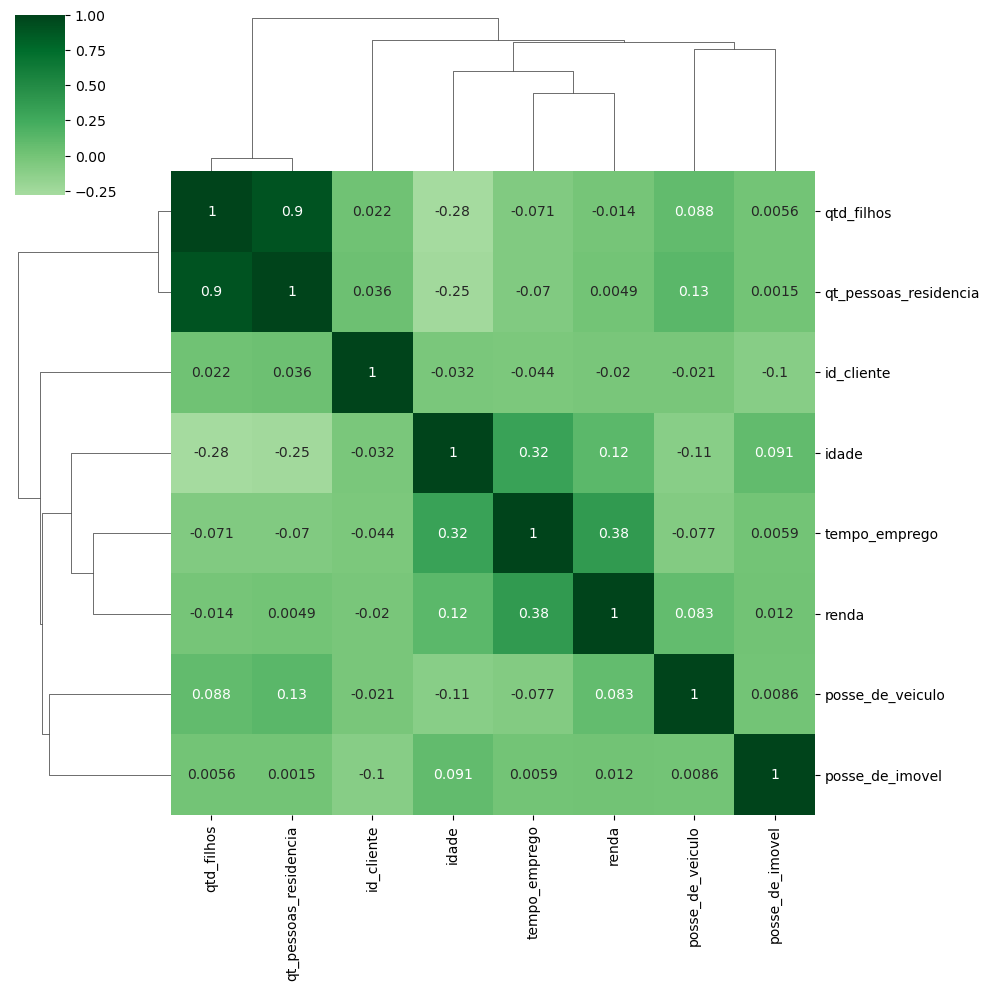

In [23]:
#7. Ajuste uma árvore de regressão e veja se consegue um $R^2$ melhor com ela.

sns.clustermap(X_train.corr(), figsize = (10, 10), annot = True, center = 0, cmap = 'Greens')

In [24]:
regr = DecisionTreeRegressor(max_depth=4)

regr.fit(X_step, y_step)

DecisionTreeRegressor(max_depth=4)

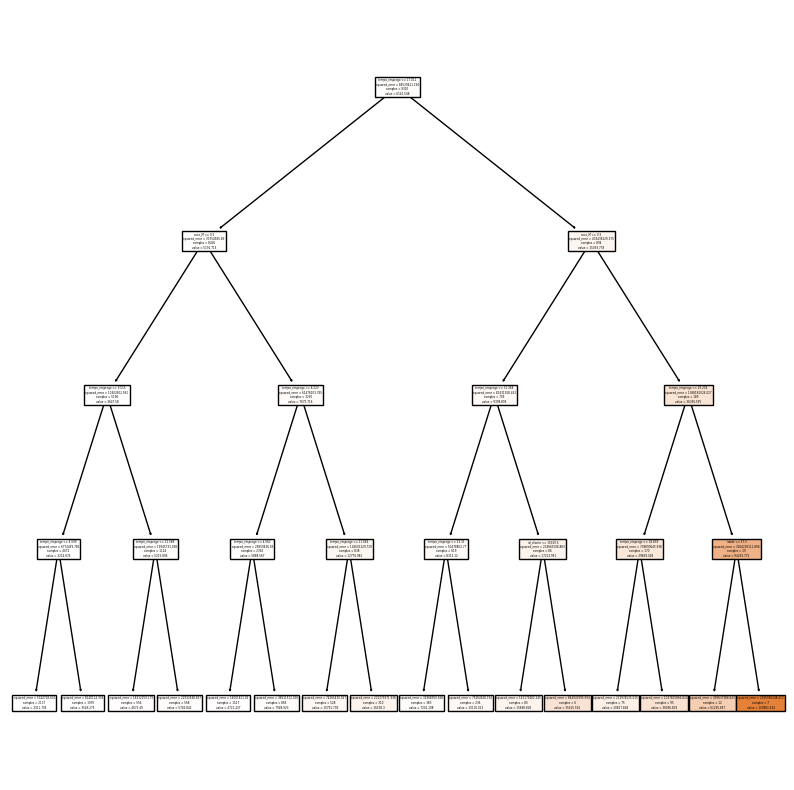

In [25]:
plt.rc('figure', figsize=(10, 10))

tp = tree.plot_tree(regr, 
                    feature_names=X_step.columns,  
                    filled=True) 

In [26]:
rquad = regr.score(X_step, y_step)

template = 'O R-quadrado da árvore de treino com profundidade = {0} é: {1:.2f}'

print(template.format(regr.get_depth(),rquad).replace(".",","))

O R-quadrado da árvore de treino com profundidade = 4 é: 0,50
